In [1]:
import pandas as pd
import numpy as np

df_you = pd.read_csv("merged_videoId_vs_Alt_id.csv", header = 0)


In [8]:
df_you = pd.read_csv("merged_videoId_vs_Alt_id.csv", header = 0)

data = df_you.loc[:,['Number of Dimensions citations',
       'Video mentions', 'cited_by_fbwalls_count', 'cited_by_feeds_count',
       'cited_by_gplus_count', 'cited_by_msm_count', 'cited_by_rdts_count', 'cited_by_tweeters_count', 'cited_by_wikipedia_count', 'subno'] ]

target = df_you.loc[:, "views_per_day_class"]

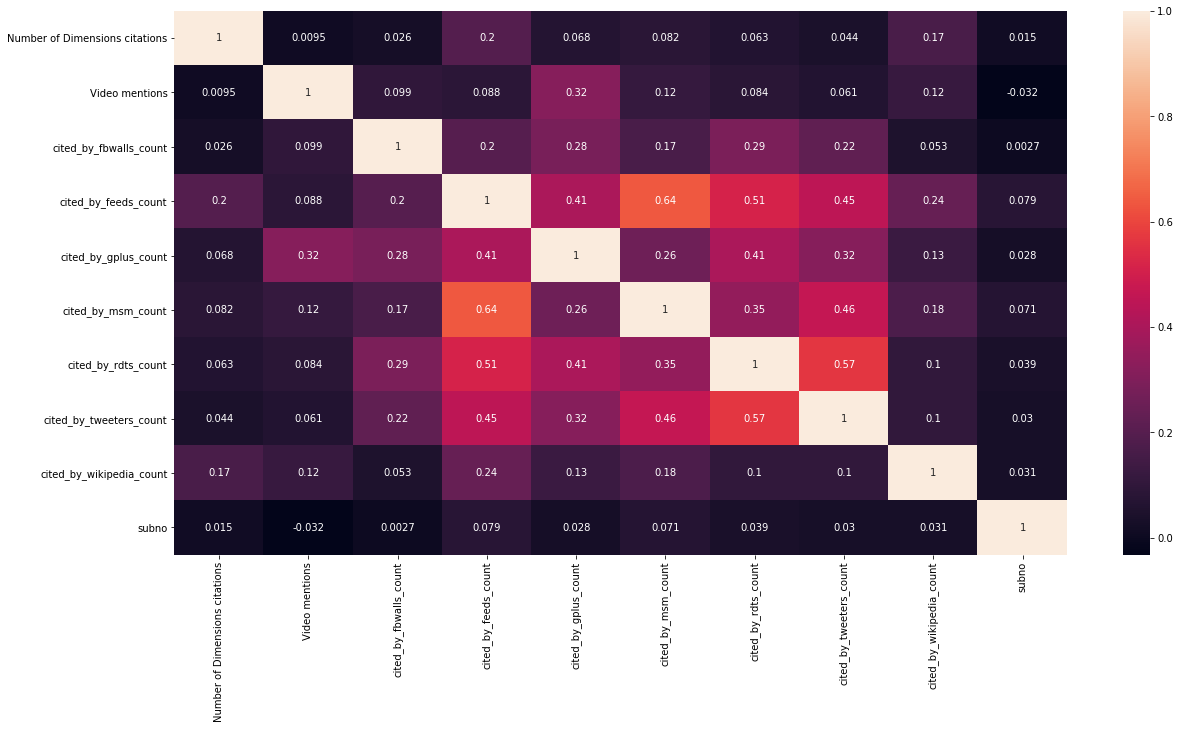

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,10 ))
sns.heatmap(data.corr(), annot= True, ax=ax)

In [3]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

C:\Users\srika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
traindata,testdata,traintarget,testtarget = train_test_split(data, target, test_size=0.25)

#feature scaling
sc = StandardScaler()
traindata = sc.fit_transform(traindata)
testdata = sc.transform(testdata)


In [5]:
#Random Forest Classifier--
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random.fit(traindata,traintarget.values.ravel())
randomresult = random.predict(testdata)
print(classification_report(testtarget,randomresult))
sklearn.metrics.accuracy_score(testtarget, randomresult)

             precision    recall  f1-score   support

          0       0.78      0.85      0.81     11122
          1       0.83      0.76      0.80     11084

avg / total       0.81      0.81      0.81     22206



0.8061334774385301

In [6]:
#logistic regression
lr = LogisticRegression(random_state = 0)
lr.fit(traindata, traintarget.values.ravel())
regres = lr.predict(testdata)
print(classification_report(testtarget,regres))
sklearn.metrics.accuracy_score(testtarget, regres)

             precision    recall  f1-score   support

          0       0.66      0.95      0.78     11122
          1       0.91      0.50      0.65     11084

avg / total       0.78      0.73      0.71     22206



0.7265603890840313

In [12]:
#Decision Tree Classifier
decision = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=5, max_leaf_nodes=10)
decision.fit(traindata,traintarget)
decisionresult = decision.predict(testdata)
print(classification_report(testtarget,decisionresult))
sklearn.metrics.accuracy_score(testtarget, decisionresult)

             precision    recall  f1-score   support

          0       0.72      0.88      0.79     11122
          1       0.85      0.65      0.74     11084

avg / total       0.78      0.77      0.76     22206



0.7675403044222282